### Distributions, sampling, confidence & t-test

1. Write a for loop that prints numbers that are divisible by 2 up to 10 (incl.)


In [16]:
for i in range(1,11):
    
    # using the modulo operator to tell me whether numbers divide evenly by 2
    
    if i%2==0:
        print(i)

2
4
6
8
10


2. Write a for loop that prints numbers from 1 to 10 (incl.), with an 80% chance of each number being printed (e.g. 1, 2, 4, 5, 7, 8, 9, 10)

In [24]:
import numpy as np

for i in range(1,11):
    
    # getting a random integer between 1 and 10 and selecting the numbers (1-10) when the random number is
    # 8 or less.
    
    if np.random.randint(1,11) <= 8:
        print(i)
    

1
2
4
6
8
9
10


3. Tossing a coin one time fits which distribution?
    - Tossing it multiple times would fit which distribution?

In [ ]:
Tossing a coin one time fits which distribution? Bernouli
Tossing it multiple times would fit which distribution? Binomial

4. Write a function that calculates the chances to get 60 heads or more in 100 tosses of a coin if the coin is fair. 

Hint: Do this by running a simulation.

In [36]:
distribution = np.random.randint(0, 2, 100)
        
distribution.shape[0]

100

In [96]:
def coin_tosses():
    
    # creating an empty list to put a sum of heads from each 100 coin tosses trail     
    
    num_heads = []
    
    # doing the trail (does a random number one(heads) or zero(not heads) come up) 100 times     
    
    for i in range(1000):
        num_heads.append(np.random.randint(0, 2, 100).sum())
        
    # counting the trails in which more than 60 heads came up
    
    counter = 0
    for i in num_heads:
        if i >= 60:
            counter+=1
    
    # calculating the percentage of trails with greater than 60 head
    
    prob = counter/1000
    
    return prob

In [97]:
coin_tosses()

0.026

5. According to the exercise in question #4 explain:
    - If you were to create a hypothesis test, what would your null hypothesis be? (specifically for question #4)
    - What is your P-value? (specifically for question #4)

In [66]:
# H0: The coin is fair (i.e. there is a 50% chance of getting heads on each toss)
# HA: The coin is biased (i.e. there is a greater than 50% chance of getting heads on each toss)

6. Load the student-mat.csv dataset and perform a t-test comparing final grades of males vs females. Before running the test, remove individuals that scored 0. Use only the sex and G3 (final grade) columns to run your test.
    
    - Is there a significant difference between how women and men perform? 
    - What is your p-value? How would you interpret it?

In [67]:
import pandas as pd
df = pd.read_csv('student-mat.csv')

In [68]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [91]:
males = df.loc[(df['sex']=='M') & (df['G3']!=0)]
females = df.loc[(df['sex']=='F') & (df['G3']!=0)]

3.174451848089711
3.258748386186274


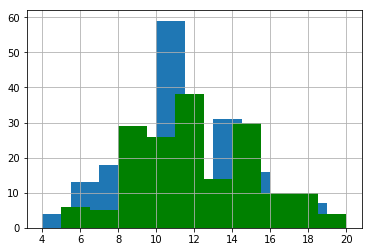

In [93]:
# Checking whether the samples have normal distributions and equal variance. 

%matplotlib inline
print(females['G3'].std())
print(males['G3'].std())
females['G3'].hist()
males['G3'].hist(color='green')

# They do have similar variance, but they're not exactly normal.


In [94]:
# Running a ttest

from scipy.stats import ttest_ind

ttest_ind(females['G3'],males['G3'])

Ttest_indResult(statistic=-1.9404771273257526, pvalue=0.053113174845791505)

In [95]:
# If we are using a standard alpha=0.5, this result is not statistically significant, meaning we cannot reject 
# the null hypothesis (They are no different). 

# The p value tells you the frequency with which we would expect to find a distribution like this one if the null 
# hypothesis were true. We can't rule out the possibility that we'd get a distribution like this with random sampling
# in the same population.

